# Задача 6

## Линейное уравнение конвекции-диффузии с постоянными коэффициентами:
$$
    \frac{\partial u}{\partial t} + v\frac{\partial u}{\partial x}-D\frac{\partial^2 u}{\partial x}^2 = 0
$$
### Задание

Задать начальную функцию в виде 
$$
    u(0, x) = \phi(0, x, t_0)
$$
На границах интервала задавать нулевые значения функции. Используя схему Мак-Кормака и явно-неявную схему, провести расчеты при различных значениях параметров v, D, a, t0.

Для нескольких моментов времени рассчитать максимальную и среднеквадратичную погрешности.

In [318]:
#Запишем необходимые константы:
a = 3 #ширина волнового импульса 
v = 0.001
D = 0.01
t0 = 3 # время задержки

In [319]:
## Запишем сюда все необходимые функции
from math import pow, log, sqrt, sin, cos, e, pi, exp, erf
import numpy as np
from scipy.integrate import quad
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

#единичный прямоугольный импульс
def func_rect(x, a):
    if (x*x <= a*a):
        return 1
    else:
        return 0

#функция ошибок
def integrand(x):
     return -x
    
def func_F(z):
    #I = quad(integrand, 0, z)
    #return I[1]*2/sqrt(pi)
    return erf(z)

#точное решение
def phi(t, x, t0):
    if (t > 0 or t0 > 0):
        val1 = ( a-x+v*t ) / sqrt(4*D*(t+t0))
        val2 = ( a+x-v*t ) / sqrt(4*D*(t+t0))
        return 0.5 * (func_F(val1) + func_F(val2))
    elif (t == 0 & t0 == 0):
        return func_rect(x, a)

### Схема Мак_Кормака
$$
            \bar{u}_j-u_j+r({F}_{j+1}-{F}_{j})-\mu({u}_{j+1}-2{u}_{j}+{u}_{j-1})=0, {F}_j={u_jv}, \mu = v\tau/h^2 
$$
$$
\bar{u}_j-\frac{1}{2}(u_j+\bar{u}_j)+\frac{r}{2}(\bar{F}_j-\bar{F}_{j-1})-\frac{\mu}{2}(\bar{u}_{j+1}-2\bar{u}_{j}+\bar{u}_{j-1})=0, \hat{F}={\hat{u}_jv}, \mu = v\tau/h^2
$$

In [320]:
def func_predictor(Xa, Xb, Xc, v, mu, r):
    return Xb-r*v*(Xc-Xb)+mu*(Xc-2*Xb+Xa)

def func_corrector(Xb, Pa, Pb, Pc, v, mu, r):
    return 0.5*(Xb+Pb)-0.5*r*v*(Pb-Pa)+0.5*mu*(Pc-2*Pb+Pa)

#напишем функцию для разностной схемы
def func_MakKormak(lowerlayer, v, mu, r, t):
    #используем первое уравнение - предиктор
    pred_layer = []
    pred_layer.append(phi(t, 0, t0)) #нулевое граничное условие
    for i in range(1, N-1):
        pred_layer.append(func_predictor(lowerlayer[i-1], lowerlayer[i], lowerlayer[i+1], v, mu, r))
    pred_layer.append(phi(t, 0, t0)) #нулевое граничное условие

    #используем второе уравнение - корректор
    layer = []
    layer.append(phi(t, 0, t0)) #нулевое граничное условие
    for i in range(1, N-1):
        layer.append(func_corrector(lowerlayer[i], pred_layer[i-1], pred_layer[i], pred_layer[i+1], v, mu, r))
    layer.append(phi(t, 0, t0)) #нулевое граничное условие
    return layer

In [350]:
x1=-5
x2=5
N=400
tau=0.001
h=(x2-x1)/N

r=tau/h
mu=D*tau/h/h

#Задаем начальную функцию
x=[]
for i in range(0, N):
    x.append(x1+(x2-x1)/N*i)
    
#Задаем начальные условия
layer=[]
for i in range(0, N):
    layer.append(phi(t0, x[i], t0))

#запустим разностную схему
res=[]
for n in range(0, 500):
        layer=func_MakKormak(layer, v, mu, r, t0+tau*n)
        if (n % 10 == 0):
            res.append(layer)

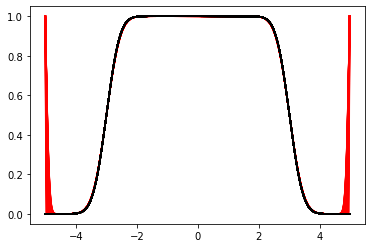

In [354]:
#постороим график результатов
for i in range(len(res)):
        plt.plot(x, res[i], color='red', label='Приближение')

#theory
theory=[]
for i in range(len(res)):
    th1=[]
    for elem in x:
        th1.append(phi(t0+i*tau, elem, t0))
    theory.append(th1)
    
for i in range(len(res)):
        plt.plot(x, theory[i], color='black', label='Теория')
    
plt.show()

In [353]:
print(len(res), mu, r)

50 0.016 0.04


In [324]:
def find_emax(results, theory, i):
    emax=0
    for j in range(len(results[i])):
        if emax<abs(results[i][j]-theory[i][j]):
            emax=abs(results[i][j]-theory[i][j])
    return emax
    
def find_erms(results, theory, i):
    erms=0
    for j in range(len(results[i])):
        foo=abs(results[i][j]-theory[i][j])
        erms+=pow(foo, 2)
    return sqrt(erms/len(results[i]))

def find_TV(results, i):
    TV=0
    for j in range(len(results[i])-1):
        TV+=abs(results[i][j+1]-results[i][j])
    return TV

In [325]:
#ошибки
print ('time moment', 15*tau, ' from ', len(res)*tau)
print ('emax', find_emax(res, theory, i=15)) #i - time mark
print ('erms', find_erms(res, theory, i=15)) #i - time mark
print ('TV', find_TV(res, i=15))

print ('time moment', 30*tau, ' from ', len(res)*tau)
print ('emax', find_emax(res, theory, i=30)) #i - time mark
print ('erms', find_erms(res, theory, i=30)) #i - time mark
print ('TV', find_TV(res, i=30))

time moment 0.015  from  0.05
emax 0.9999999961521633
erms 0.08904452979438769
TV 3.999994617514721
time moment 0.03  from  0.05
emax 0.9999999959854893
erms 0.09980653699073237
TV 3.9999775722661806


### Применим явно-неявную схему

$$
    \hat{u}_j - u_j + r(u_j - u_{j-1}) - \mu(\hat{u}_{j+1} - 2\hat{u}_j + \hat{u}_{j-1}) = 0 
$$

In [335]:
def make_newlayer(mu, r, layer, N, t, t0):
    a=-mu
    c=1+2*mu
    b=-mu
    f=(1-r)*layer[0]
    arr_c=[]
    arr_f=[]
    
    #i=1
    m=-mu/c
    c=(1+2*mu)-m*b
    f=(1-r)*layer[1]+r*phi(t, x[0]-(x[1]-x[0]), t0)
    #f=(1-r)*layer[1]+r*phi(t, 0, t0)
    arr_c.append(c)
    arr_f.append(f)
    
    for i in range(2, N):
        m=-mu/c
        c=(1+2*mu)-m*b
        f=(1-r)*layer[i]+r*layer[i-1]
        arr_c.append(c)
        arr_f.append(f)
    
    #i=N
    m=-mu/c
    c=(1+2*mu)-m*b
    f=(1-r)*phi(t, x[-1]+(x[1]-x[0]), t0)+r*layer[i]
    #f=(1-r)*phi(t, 0, t0)+r*layer[i]
    arr_c.append(c)
    arr_f.append(f)
    
    newlayer=[]
    #print(arr_f[-1], arr_c[-1])
    #print(arr_f[-1]/arr_c[-1])
    newlayer.insert(0, arr_f[-1]/arr_c[-1])
    
    for i in reversed(range(0, N-1)):
        newlayer.insert(0, (arr_f[i]+mu*newlayer[0])/arr_c[i])
    #print(len(newlayer), i, len(arr_f))
    return newlayer

In [346]:
x1=-5
x2=5
N=400
tau=0.001
h=(x2-x1)/N

r=tau/h
mu=D*tau/h/h

#Задаем начальную функцию
x=[]
for i in range(0, N):
    x.append(x1+(x2-x1)/N*i)
    
#Задаем начальные условия
layer=[]
for i in range(0, N):
    layer.append(phi(t0, x[i], t0))

#запустим разностную схему
res=[]
for n in range(0, 500):
        #print(len(layer), '!')
        layer=make_newlayer(mu, r, layer, N, t0+tau*n, t0)
        #print(len(layer), '!')
        if (n % 10 == 0):
            res.append(layer)

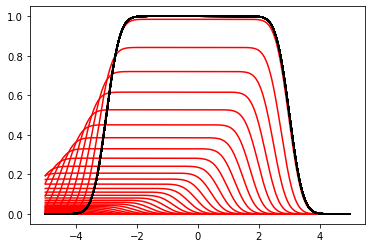

In [347]:
#постороим график результатов
for i in range(len(res)):
        plt.plot(x, res[i], color='red')

#theory
theory=[]
for i in range(len(res)):
    th1=[]
    for elem in x:
        th1.append(phi(t0+i*tau, elem, t0))
    theory.append(th1)
    
for i in range(len(res)):
        plt.plot(x, theory[i], color='black')
plt.show()

In [348]:
#ошибки
print ('time moment', 15*tau, ' from ', len(res)*tau)
print ('emax', find_emax(res, theory, i=15)) #i - time mark
print ('erms', find_erms(res, theory, i=15)) #i - time mark
print ('TV', find_TV(res, i=15))

print ('time moment', 30*tau, ' from ', len(res)*tau)
print ('emax', find_emax(res, theory, i=30)) #i - time mark
print ('erms', find_erms(res, theory, i=30)) #i - time mark
print ('TV', find_TV(res, i=30))

time moment 0.015  from  0.05
emax 0.9999999879097544
erms 0.7233595103974007
TV 0.09479255334037795
time moment 0.03  from  0.05
emax 0.9999999998402763
erms 0.7488765512465555
TV 0.007810155631762165


In [345]:
print(mu, r)

0.016 0.4
